In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import norm

To compile with $\rm\LaTeX$ you should load the `latex.mplstyle` sheet at the top of the file. It appears to not work with `plt.style.context`.

In [2]:
# plt.style.use('latex.mplstyle')  # comment out this line for faster, non-latex, sans-serif rendering.

Here is some example data to plot.

In [3]:
def sigmoid(x, a=0.0, b=1.0):
    return 1 / (1 + np.exp(-b*(x-a)))

x = np.linspace(-1.0, 1.0, 100)[:, np.newaxis]
b = np.arange(6)
y = sigmoid(x, 0.0, b)

Generate labels for the legend.

In [4]:
labels = [f'$b = {i}$' for i in b]

Use `matplotlib` context manager to choose appropriate combinations of styles.

## Single column paper styles

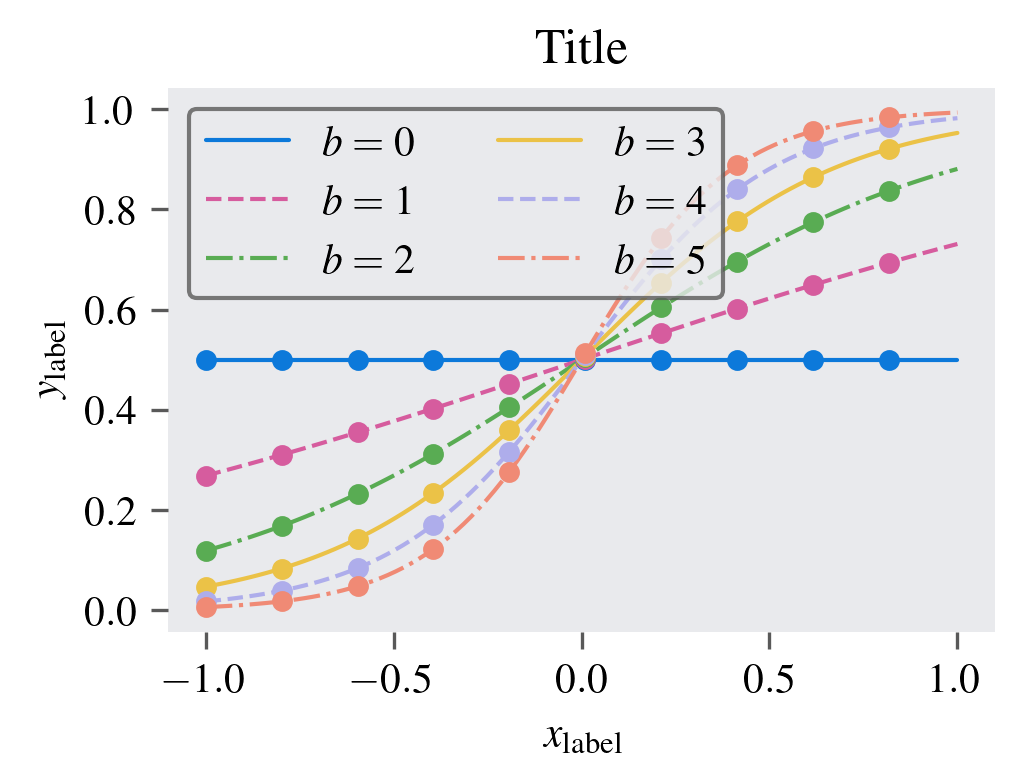

In [42]:
marker=['o', '^', 's', 'd']

with plt.style.context(['cartography-light.mplstyle', 'paper-single.mplstyle',
#                         'grid.mplstyle'
                       ]):

    fig, ax = plt.subplots()
    lines = ax.plot(x, y)
    ax.plot(x[::10], y[::10], marker='o', linestyle='none')
#     ax.scatter(x, np.random.uniform(1., 3., 100), label='scatter')

    ax.set_xlabel(r'$x_\mathrm{label}$')
    ax.set_ylabel(r'$y_\mathrm{label}$')
    ax.set_title('Title')
    ax.legend(handles=lines, labels=labels, loc='upper left', ncol=2)

# plt.savefig('light-single-latex.png')
# plt.savefig('../asterion/paper/aas/figures/example-figure.png')

In [43]:
with plt.style.context('cartography-dark.mplstyle'):
    fig.savefig('test.png')

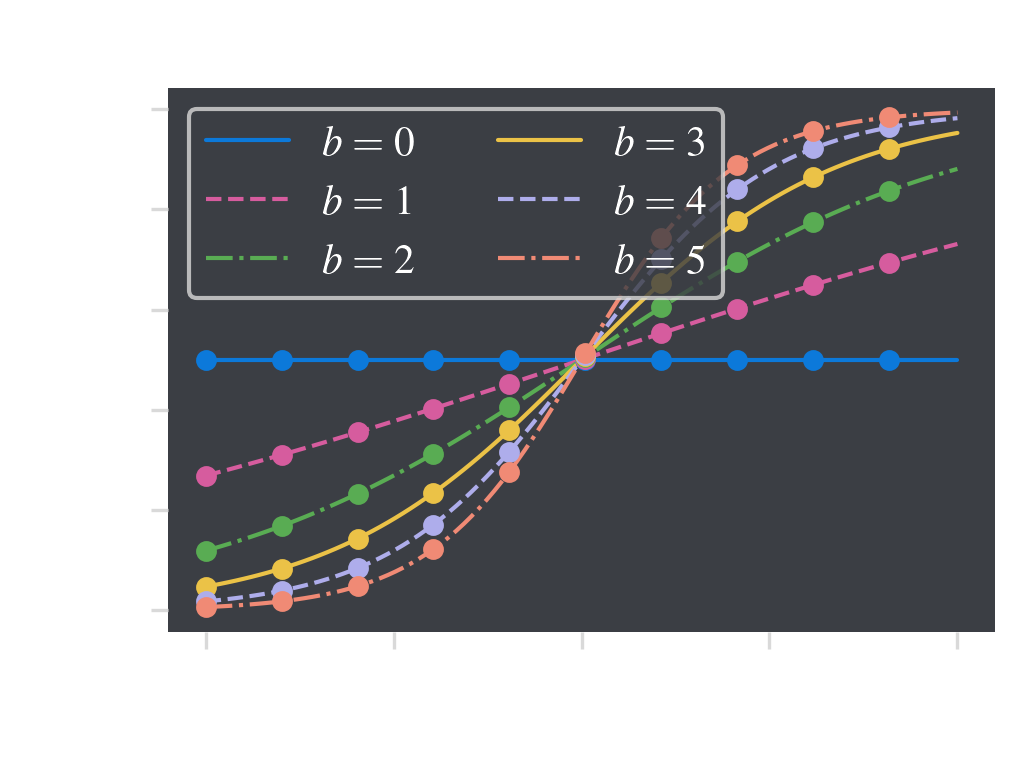

In [6]:
with plt.style.context(['cartography-dark.mplstyle', 'paper-single.mplstyle',
#                         'grid.mplstyle'
                       ]):

    fig, ax = plt.subplots()
    lines = ax.plot(x, y)
    ax.plot(x[::10], y[::10], marker='o', linestyle='none')
#     ax.scatter(x, np.random.uniform(1., 3., 100), label='scatter')

    ax.set_xlabel(r'$x_\mathrm{label}$')
    ax.set_ylabel(r'$y_\mathrm{label}$')
    ax.set_title('Title')
    ax.legend(handles=lines, labels=labels, loc='upper left', ncol=2)

plt.savefig('dark-single-latex.png')
plt.savefig('../asterion/paper/aas/figures-dm/example-figure.png')

## Double column paper styles

In [23]:
x = np.linspace(-1.0, 1.0, 100)[:, np.newaxis, np.newaxis]
b = np.arange(6)[:, np.newaxis]
a = np.array([0.9, 0.3, -0.3, -0.9])
y = sigmoid(x, a, b)

In [24]:
titles = [f'$a = {j}$' for j in a]

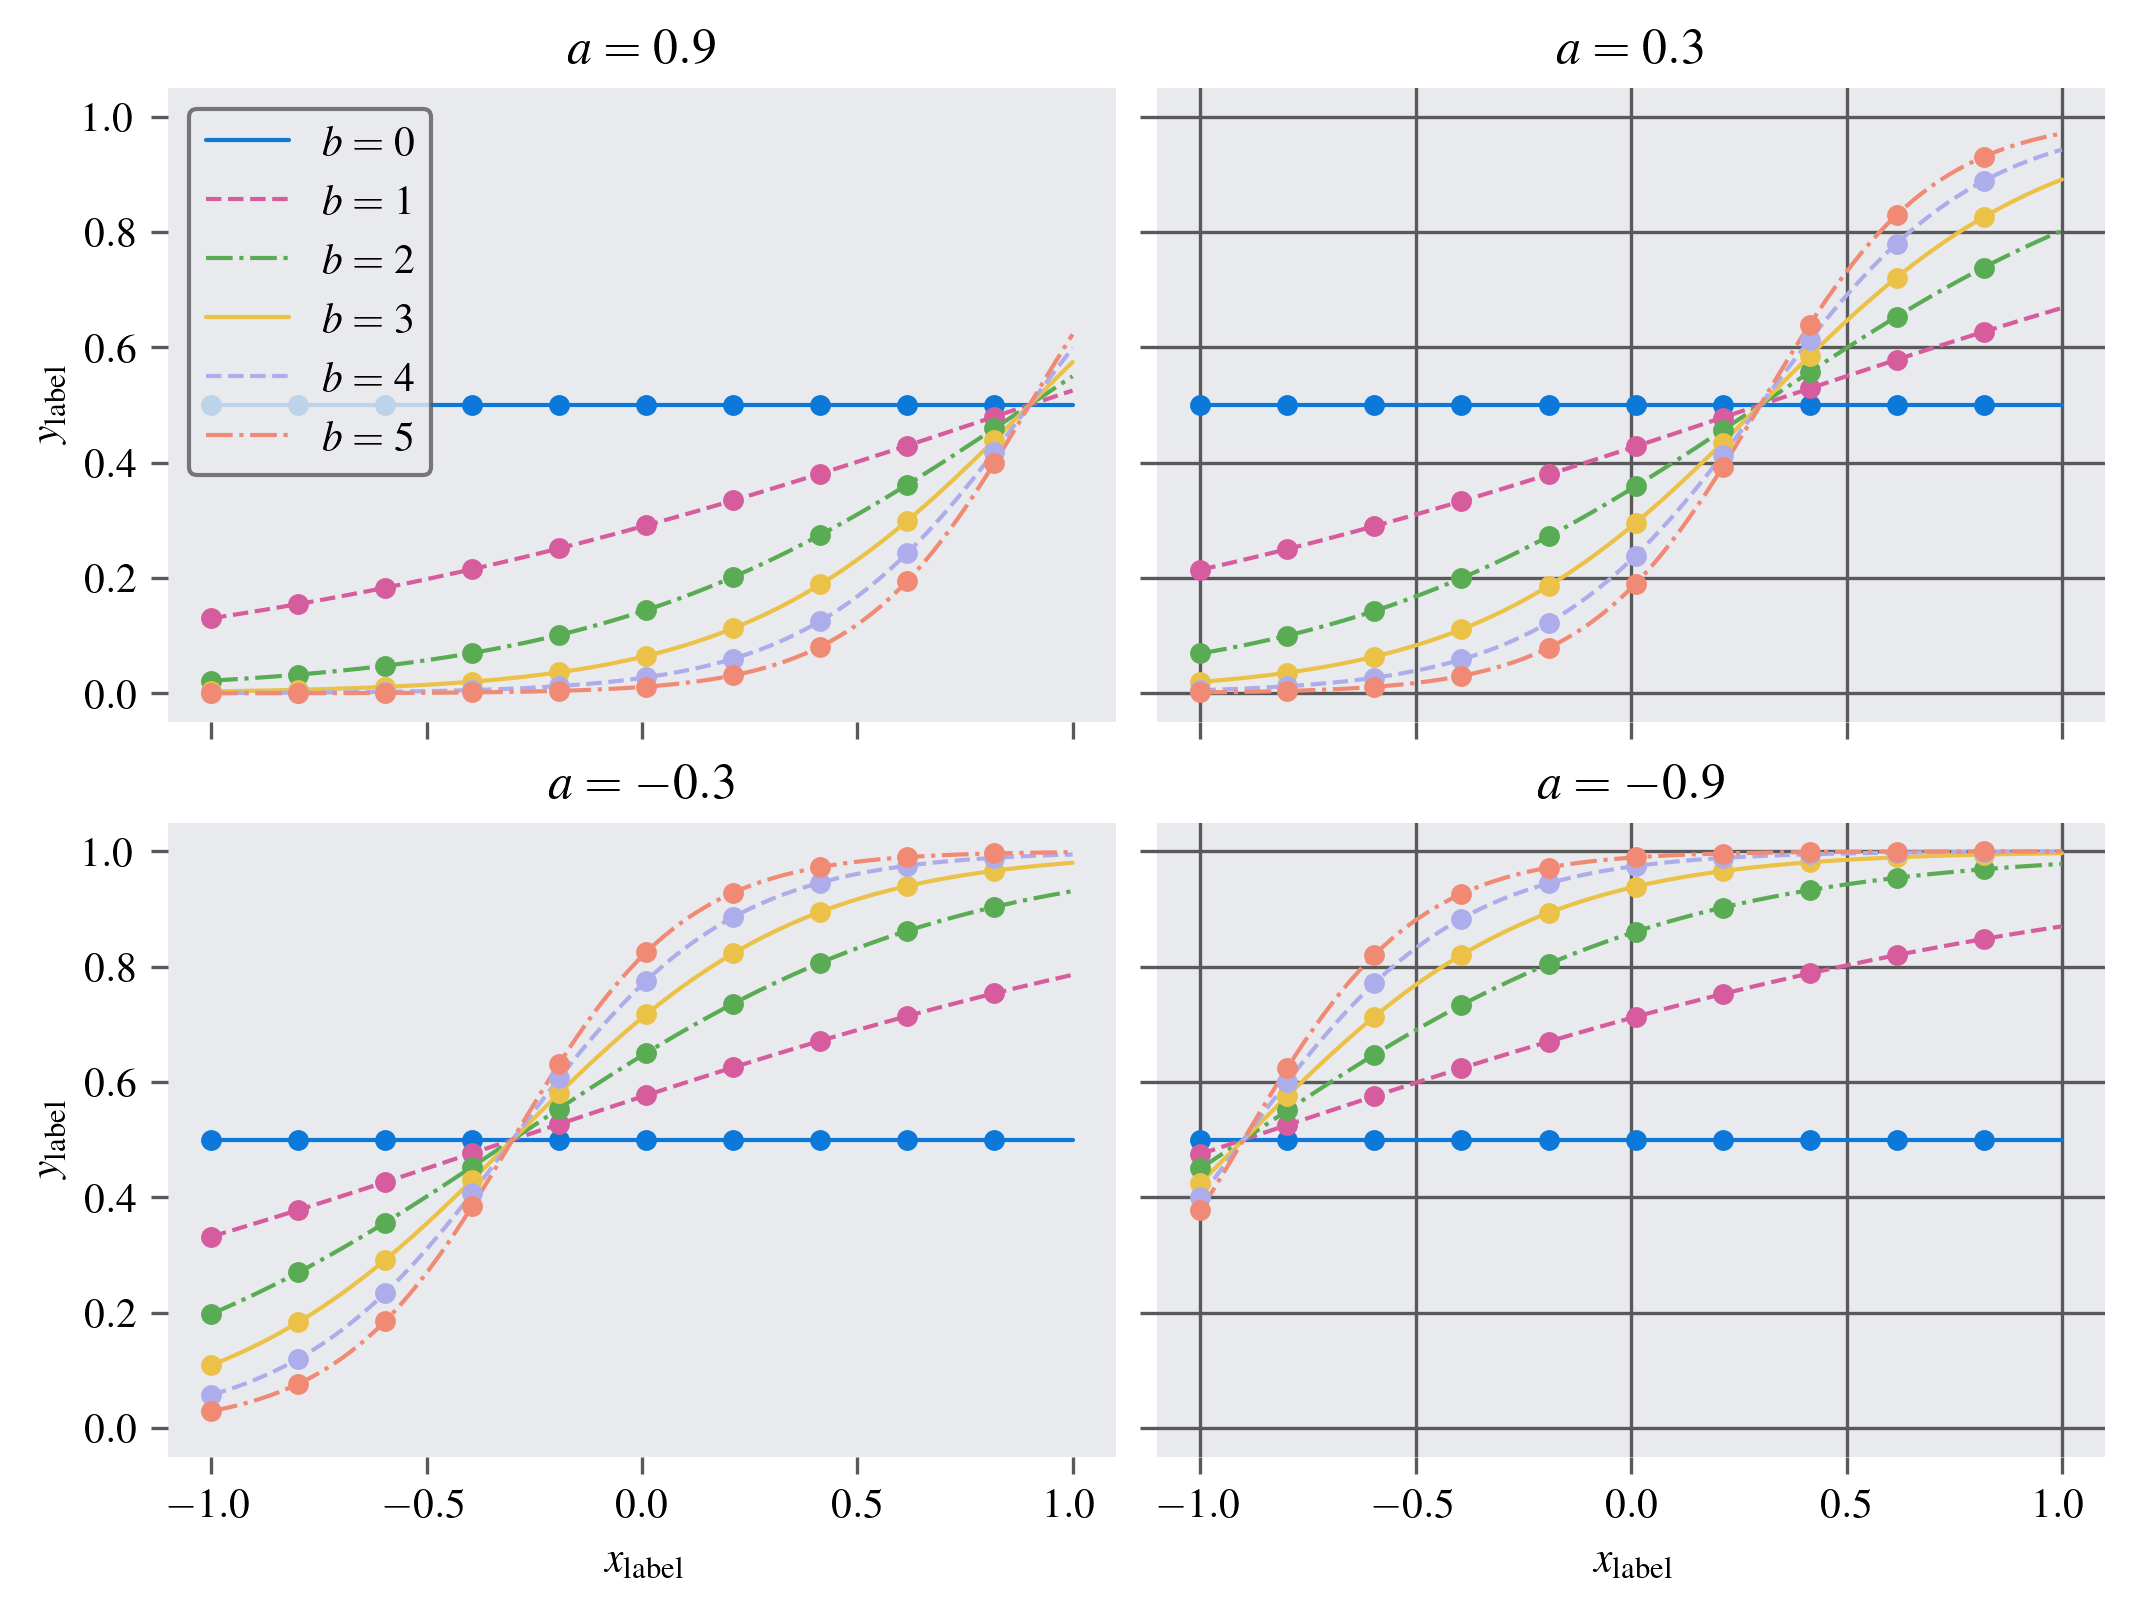

In [30]:
nrow = 2
ncol = 2

with plt.style.context(['cartography-light.mplstyle', 'paper-double.mplstyle']):

    fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True)

    n = nrow * ncol
    for j, ax in enumerate(np.ravel(axes)):
        lines = ax.plot(x[:, 0, 0], y[:, :, j])
        ax.plot(x[::10, 0, 0], y[::10, :, j], marker="o", linestyle='none')

        if j >= (n - nrow):
            ax.set_xlabel(r'$x_\mathrm{label}$')
        if j % nrow == 0:
            ax.set_ylabel(r'$y_\mathrm{label}$')
        if j == 0:
            ax.legend(handles=lines, labels=labels)
            
        ax.set_title(titles[j])

        if (j+1)%2 == 0:
            ax.grid()

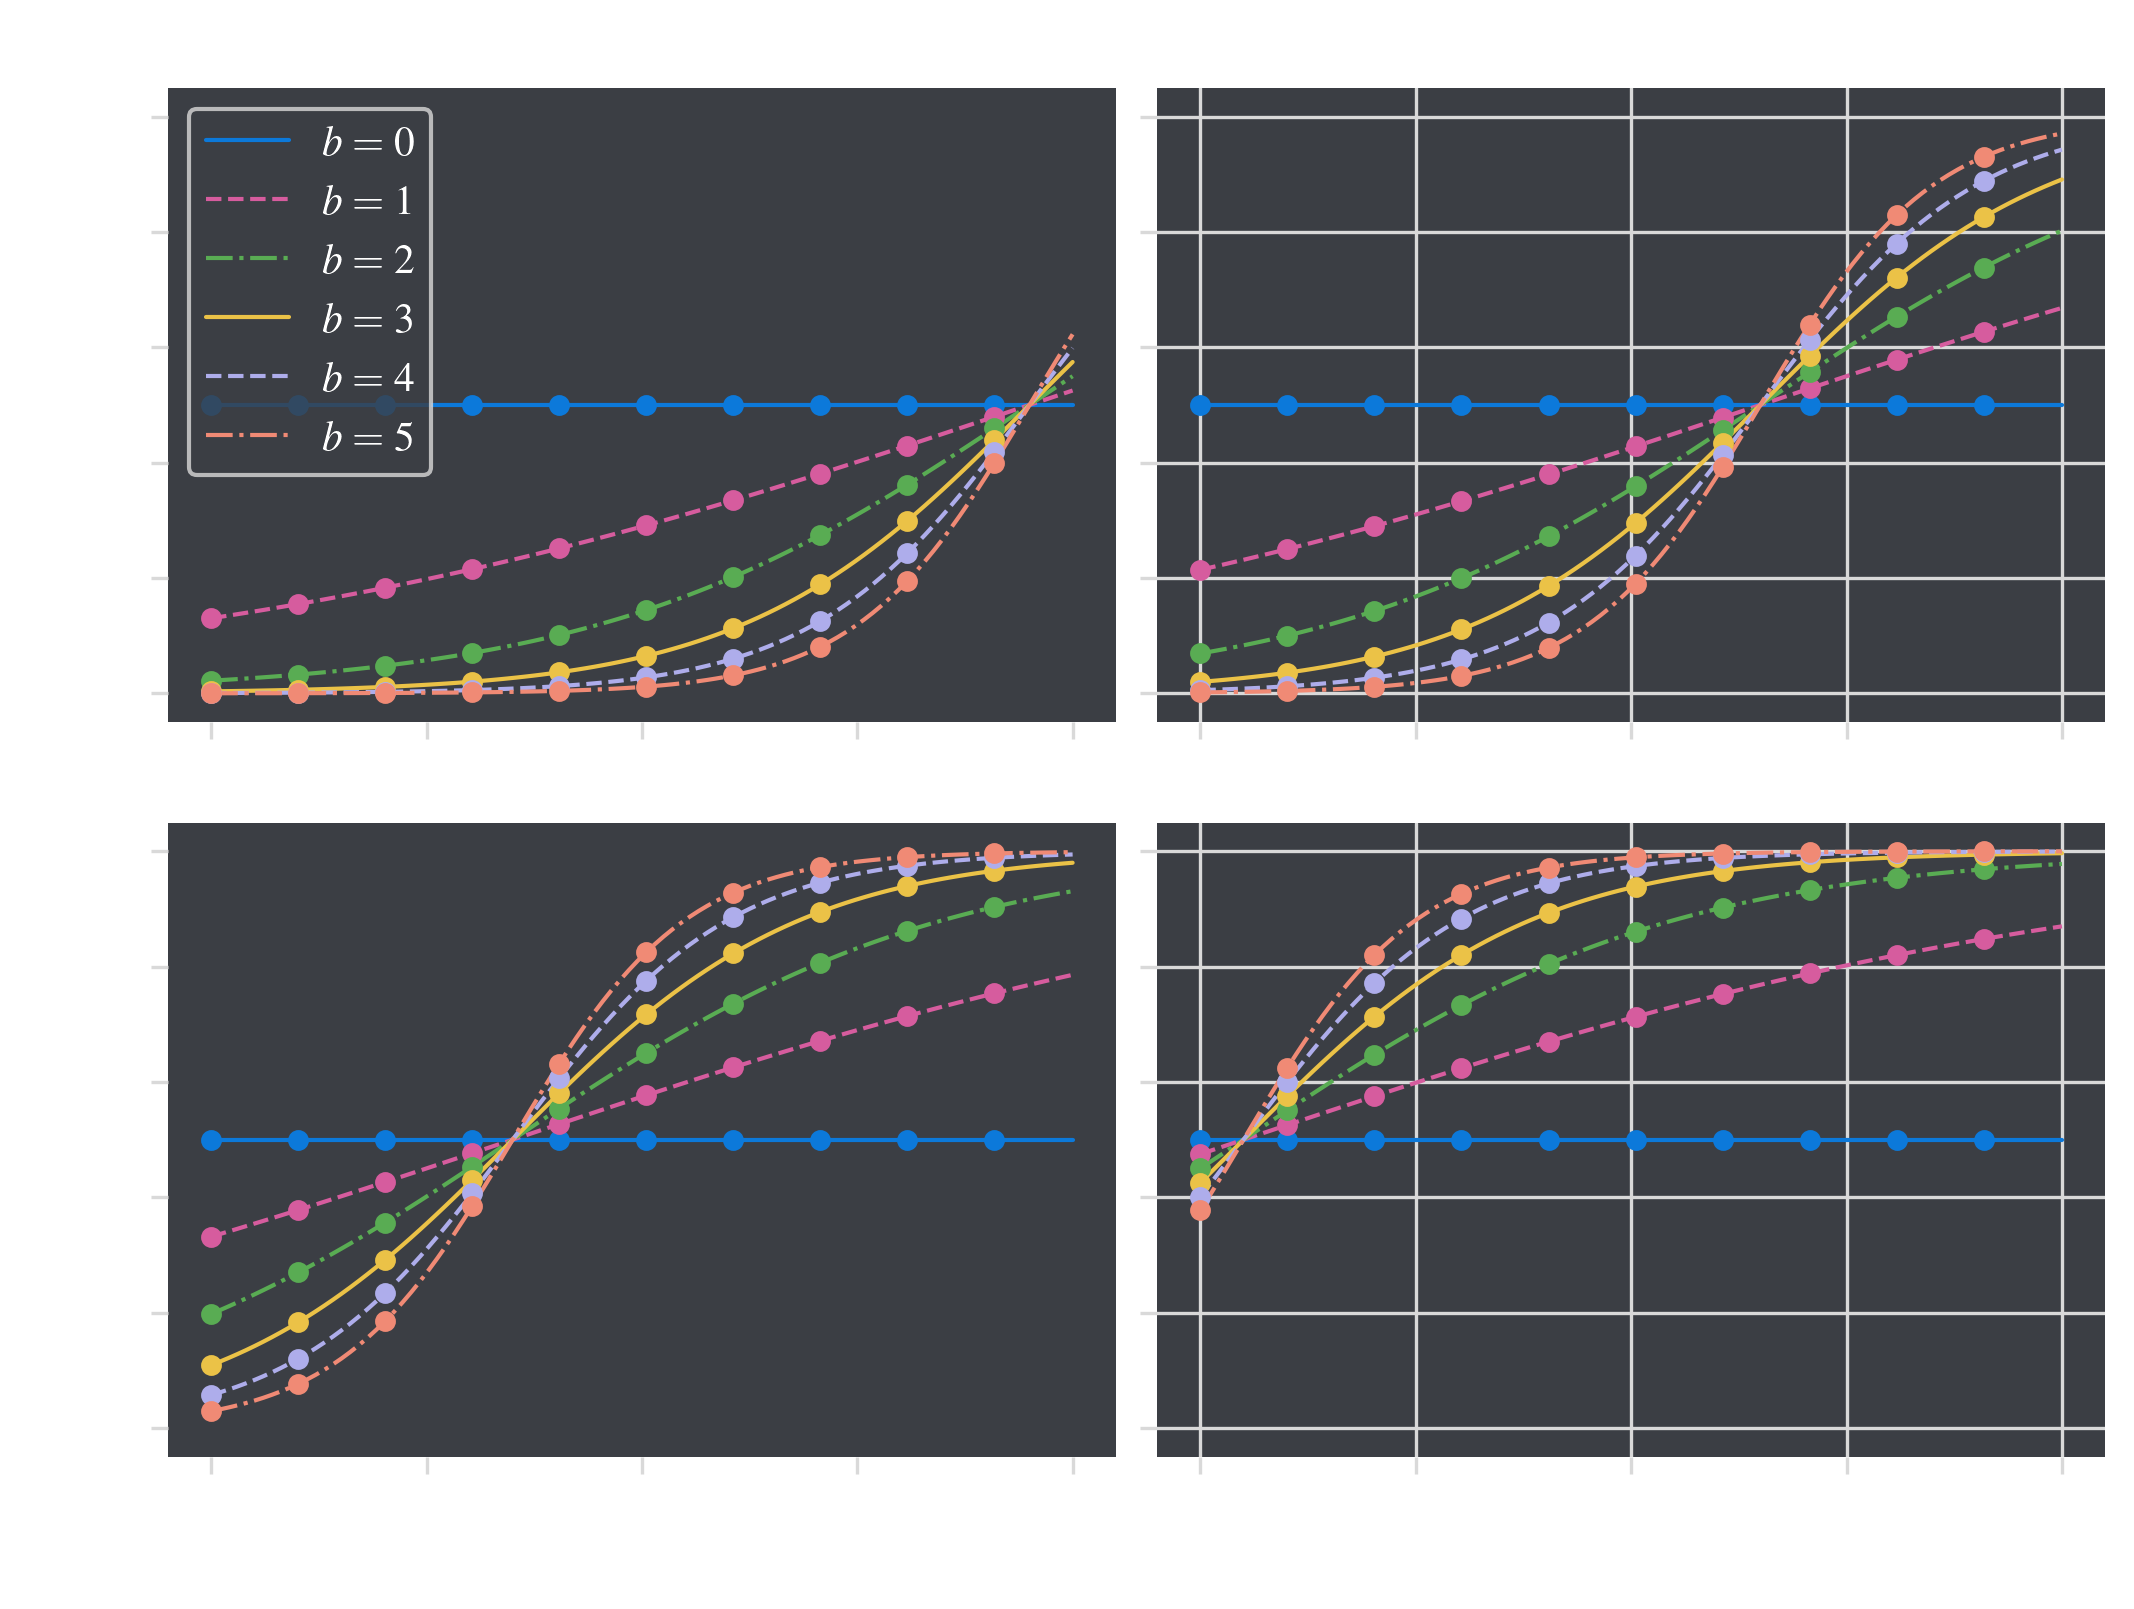

In [29]:
with plt.style.context(['cartography-dark.mplstyle', 'paper-double.mplstyle']):

    fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True)

    n = nrow * ncol
    for j, ax in enumerate(np.ravel(axes)):
        lines = ax.plot(x[:, 0, 0], y[:, :, j])
        ax.plot(x[::10, 0, 0], y[::10, :, j], marker="o", linestyle='none')

        if j >= (n - nrow):
            ax.set_xlabel(r'$x_\mathrm{label}$')
        if j % nrow == 0:
            ax.set_ylabel(r'$y_\mathrm{label}$')
        if j == 0:
            ax.legend(handles=lines, labels=labels)
            
        ax.set_title(f'$a = {a[j]}$')
        if (j+1)%2 == 0:
            ax.grid()

## Colormaps

Here are the default colormaps for each scheme.

In [31]:
n = 500
x = norm.rvs(loc=0.0, scale=1.0, size=n)
y = norm.rvs(loc=0.0, scale=1.0, size=n)
c = norm.pdf(np.sqrt(x**2 + y**2), loc=0.0, scale=1.0)

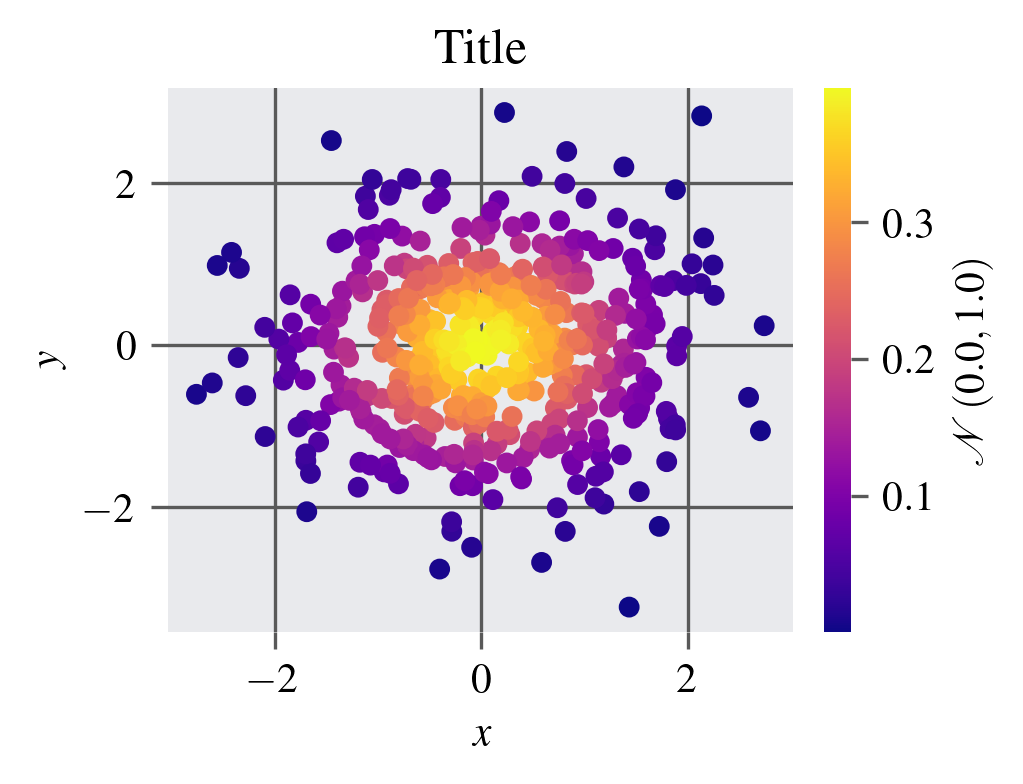

In [32]:
with plt.style.context(['cartography-light.mplstyle', 'paper-single.mplstyle']):

    fig, ax = plt.subplots()
    s = ax.scatter(x, y, c=c, label='scatter')
    cbar = plt.colorbar(s, label=r'$\mathcal{N}\left(0.0, 1.0\right)$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title('Title')
    ax.grid()

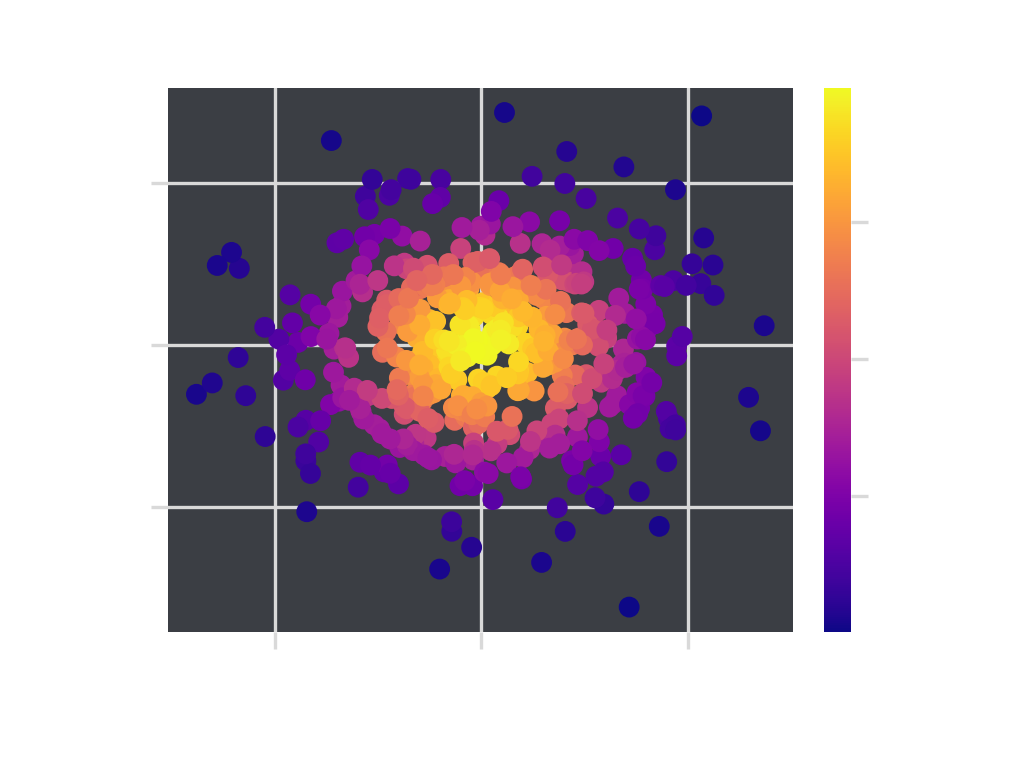

In [33]:
with plt.style.context(['cartography-dark.mplstyle', 'paper-single.mplstyle']):

    fig, ax = plt.subplots()
    s = ax.scatter(x, y, c=c, label='scatter')
    cbar = plt.colorbar(s, label=r'$\mathcal{N}\left(0.0, 1.0\right)$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title('Title')
    ax.grid()